In [12]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import time

In [13]:
fitness_per_eval = []
fitness_per_iter = []

In [14]:
schwefeldf = pd.read_csv('../data/schwefel.csv')
f_biasdf = pd.read_csv('../data/f_bias.csv')

schwefel = schwefeldf.fvalue.values
f_bias = f_biasdf.fvalue.values

In [15]:
f_xstar = f_bias[1]
search_space = (-100,100)

Schwefel function C code
```
double Schwefel_Problem( int dim , double* x ){
    int i;
    double z;
    double F = abss(x[0]);
    for(i=1;i<dim;i++){
    	  z = x[i] - schwefel[i];
        F = max(F , abss(z));
    }
    return F + f_bias[1]; 
}
```

In [38]:
@jit(nopython=True)
def fschwevel(x, dim):
    F = abs(x[0])
    for i in range(dim-1):
        z = x[i] - schwefel[i]
        F = max(F,abs(z))
    result = F + f_bias[1]
  
    return result

In [39]:
def f(x,dim):
    result = fschwevel(x,dim)
    fitness_per_eval.append(result-f_xstar)
    return result

In [61]:
def callback_f(xk,f,accept):
    result = f
    fitness_per_iter.append(result-f_xstar)

In [80]:
def initial_solution(dim,bounds):
    xmin, xmax = bounds
    x_min = xmin * np.ones(D)
    x_max = xmax * np.ones(D)
    cur_x = np.random.uniform(min(x_min), max(x_max), (1, D))
    return cur_x

In [81]:
def optimize_minimize(dim,search_space,method,options):
    global fitness_per_eval
    global fitness_per_iter
    
    fitness_per_eval = []
    fitness_per_iter = []
    
    result=None
    cur_x = initial_solution(dim,search_space)
    t0 = time.time()
#     result = optimize.minimize(f, args=(dim), x0=cur_x, method=method, options=options, callback=callback_f)
    result = optimize.basinhopping(f, minimizer_kwargs={'args':dim}, x0=cur_x, callback=callback_f)
    t1 = time.time()
    return result, t1-t0

In [86]:
D = 50
# method = 'L-BFGS-B'
# options = {'maxiter': 100, 'gtol': 1e-5, 'disp': False}
method = 'SLSQP'
options = {'maxiter': 1000, 'ftol': 1e-5, 'disp': False}
result, duration = optimize_minimize(D,search_space,method,options)

In [87]:
print("Algorithm: %s" % method)
print("Parameters: %s" % options)
print("Solution: %f - Fitness: %f" % (result.fun,fitness_per_eval[-1]))
print("Nb of functions evaluations: %d in %d iterations" % (result.nfev,result.nit))
print("Stopping criterion: %s" % result.message)
print("computanional time: %.3f seconds" % duration)

Algorithm: SLSQP
Parameters: {'maxiter': 1000, 'ftol': 1e-05, 'disp': False}
Solution: -436.556051 - Fitness: 13.443949
Nb of functions evaluations: 523218 in 100 iterations
Stopping criterion: ['requested number of basinhopping iterations completed successfully']
computanional time: 1.912 seconds


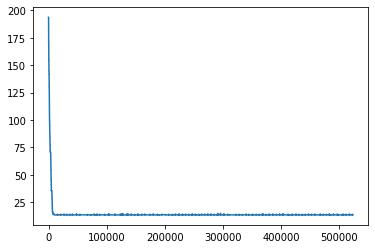

In [88]:
plt.plot(fitness_per_eval)
plt.show();

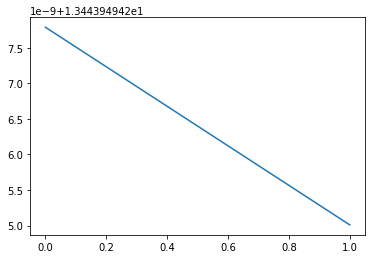

In [58]:
plt.plot(fitness_per_iter)
plt.show();

In [47]:
D = 500
# method = 'L-BFGS-B'
# options = {'maxiter': 100, 'gtol': 1e-5, 'disp': False}
method = 'SLSQP'
options = {'maxiter': 100, 'ftol': 1e-5, 'disp': False}

result, duration = optimize_minimize(D,search_space,method,options)

In [48]:
print("Algorithm: %s" % method)
print("Parameters: %s" % options)
print("Solution: %f - Fitness: %f" % (result.fun,fitness_per_eval[-1]))
print("Nb of functions evaluations: %d in %d iterations" % (result.nfev,result.nit))
print("Stopping criterion: %s" % result.message)
print("computanional time: %.3f seconds" % duration)

Algorithm: SLSQP
Parameters: {'maxiter': 100, 'ftol': 1e-05, 'disp': False}
Solution: -436.556051 - Fitness: 13.443949
Nb of functions evaluations: 645105 in 2 iterations
Stopping criterion: ['requested number of basinhopping iterations completed successfully']
computanional time: 6.073 seconds


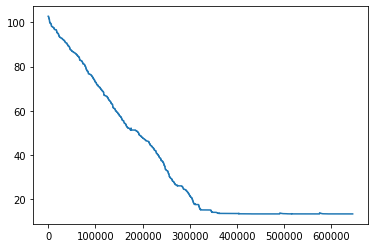

In [49]:
plt.plot(fitness_per_eval)
plt.show();

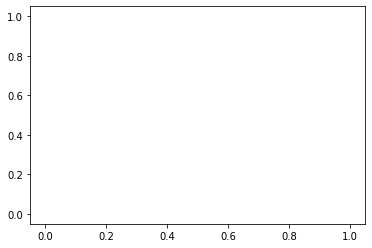

In [50]:
plt.plot(fitness_per_iter)
plt.show();